In [60]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from math import e, pi, log, sin, sqrt

In [61]:
fun1 = lambda x: e ** (-(x**2)) * (log(x) ** 2)
fun2 = lambda x: 1 / (x**3 - 2 * x - 5)
fun3 = lambda x: x**5 * e ** (-x) * sin(x)
fun4 = lambda x, y: 1 / (sqrt(x + y) * (1 + x + y))
fun5 = lambda x, y: x**2 + y**2

Zadanie 1  
Napisz funkcję, która przyjmuje dwa wektory o równej długości:  
    •wektor prędkości chwilowych mierzonych prędkościomierzem (w km/h),  
    •wektor czasu (w sekundach),  
a następnie oblicza przebytą drogę (w km) korzystając z metody trapezów (cumtrapz,  
trapezoid). Przedstaw przykładowe wyniki obliczeń za pomocą wykresów.  

In [62]:
def find_travelled_distance(speed_vector, time_vector):
    sum = 0
    for i in range(len(speed_vector) - 1):
        v1 = speed_vector[i]
        v2 = speed_vector[i+1]
        t1 = time_vector[i]
        t2 = time_vector[i+1]

        sum += ( (t2 - t1) * (v1 + v2) / 2 ) / 3600

    return sum

Test

In [63]:
n = 1000
t = np.arange(0,n,1) # seconds
speed = np.random.randint(1,100, n) # km/h
dist = find_travelled_distance(t, speed)
print("Travelled distance: ", dist, "km")

Travelled distance:  -11.058611111111109 km


In [64]:
t_vector = [1, 3, 4, 5] # seconds
s_vector = [5, 12, 13, 9] # km/h
dist = find_travelled_distance(s_vector, t_vector)
print("Travelled distance: ", dist, "km")

Travelled distance:  0.011250000000000001 km


Zadanie 2  
Napisz funkcję, która przyjmuje dwa wektory o równej długości:  
•wektor x - węzły równoodległe  
•wektor y - wartości funkcji  
a następnie oblicza wartość całki oznaczonej korzystając ze złożonej kwadratury Simp-  
sona. Porównaj dokładność zaimplementowanej kwadratury z wybraną kwadraturą ad-  
aptacyjną dla przykładowych funkcji i przedziałów całkowania.  

In [65]:
def composite_simpson_quadrature(x_vector, y_vector):
    sum = y_vector[0] + y_vector[-1]
    h = x_vector[1] - x_vector[0]
    
    for i, y in list(enumerate(y_vector))[1:-1]:
        if i % 2 == 0:
            sum += 2 * y
        else:
            sum += 4 * y
    
    return sum * h / 3

In [66]:
def compare_quadratures(fun, a, b, n):
    x = np.linspace(a, b, n)
    y = [fun(i) for i in x]
    integral = integrate.quad(fun, a, b)[0]
    print("Integral: ", integral)
    print("Composite Simpson quadrature: ", composite_simpson_quadrature(x, y))
    plt.plot(x, y)

Test

Integral:  1.8695244786404053
Composite Simpson quadrature:  1.8959099509111106


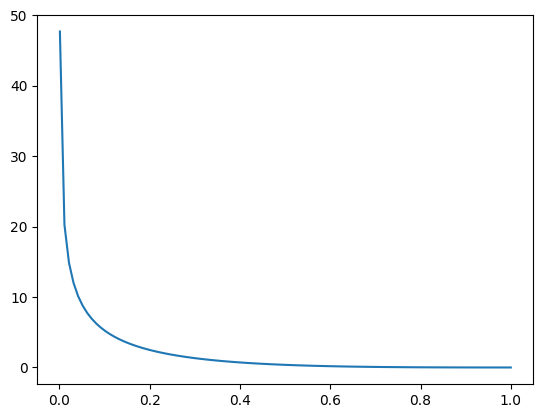

In [67]:
compare_quadratures(fun1, 0.001, 1, 100)

Integral:  -0.17434128995417508
Composite Simpson quadrature:  -0.17378115527374258


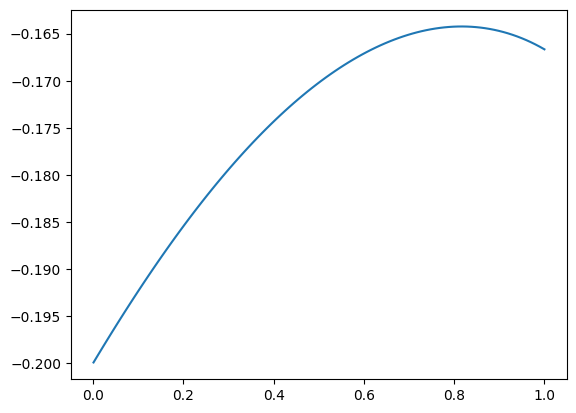

In [68]:
compare_quadratures(fun2, 0.001, 1, 100)

Integral:  0.05267013765345552
Composite Simpson quadrature:  0.051653277724978915


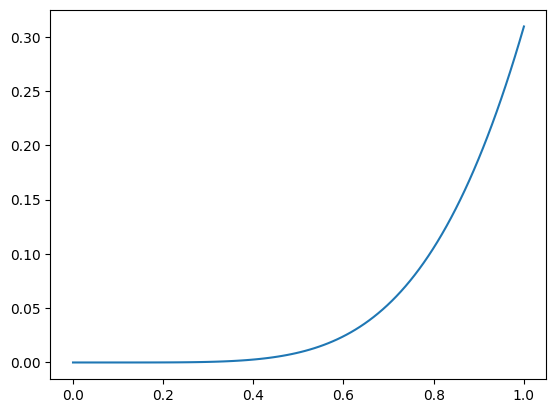

In [69]:
compare_quadratures(fun3, 0.001, 1, 100)

Zadanie 3  
1. Oblicz wartość oznaczonej całki podwójnej dla funkcji f4(x, y) i podanych granic  
całkowania (integral2, dblquad)  
2. Oblicz wartość oznaczonej całki podwójnej dla funkcji f5(x, y) wykorzystując dwu-  
krotnie metodę trapezów. Jak zmienia się dokładność względem liczby punktów  
siatki 2D? Przy jakim rozmiarze siatki dokładność jest podobna do dokładności  
uzyskanej za pomocą metody adapatacyjnej (integral2, dblquad)?

Ad 1.

In [70]:
result = integrate.dblquad(fun4, 0,1, lambda x: 0, lambda x: 1 - x)[0]
print(" Integral of f(x,y) = 1 / (sqrt(x + y) * 1 + x + y)\n \
with boundaries 0<=x<=1, 0<=y<=1-x\n \
is: ", result)

 Integral of f(x,y) = 1 / (sqrt(x + y) * 1 + x + y)
 with boundaries 0<=x<=1, 0<=y<=1-x
 is:  0.4292036732051043


Ad 2.

In [71]:
def double_integral(fun, x_range, y_range, delta):
    sum = 0.0
    x = x_range[0] + delta / 2
    while x <= x_range[1] + delta:
        y = y_range[0] + delta / 2
        while y < y_range[1] + delta:
            sum += delta**2 * fun(x, y)
            y += delta
        x += delta
    
    return sum

Step in calculations => 0.1

In [72]:
x_values = [-3, 3]
y_values = [-5, 5]
actual_result = integrate.dblquad(fun5, x_values[0], x_values[1], y_values[0], y_values[1])[0]
print("Actual result: ", actual_result)
print("Calculated result: ", double_integral(fun5, x_values, y_values, 0.1))


Actual result:  680.0
Calculated result:  714.9840499999997


Step in calculations => 0.01

In [73]:
x_values = [-3, 3]
y_values = [-5, 5]
actual_result = integrate.dblquad(fun5, x_values[0], x_values[1], y_values[0], y_values[1])[0]
print("Actual result: ", actual_result)
print("Calculated result: ", double_integral(fun5, x_values, y_values, 0.01))

Actual result:  680.0
Calculated result:  683.4217440049631


Step in calculations => 0.001

In [74]:
x_values = [-3, 3]
y_values = [-5, 5]
actual_result = integrate.dblquad(fun5, x_values[0], x_values[1], y_values[0], y_values[1])[0]
print("Actual result: ", actual_result)
print("Calculated result: ", double_integral(fun5, x_values, y_values, 0.001))

Actual result:  680.0
Calculated result:  680.3414173441328


Step in calculations => 0.0001  
This will take 3000 seconds to calculate

In [76]:
x_values = [-3, 3]
y_values = [-5, 5]
actual_result = integrate.dblquad(fun5, x_values[0], x_values[1], y_values[0], y_values[1])[0]
print("Actual result: ", actual_result)
#print("Calculated result: ", double_integral(fun5, x_values, y_values, 0.0001))

Actual result:  680.0
